In [5]:
import requests
import json

def fetch_psi_pm25_data(date):
    """
    Fetches PSI and PM2.5 data for a specific date from Singapore's Open Data API.

    Parameters:
    date (str): The date for which to fetch data in 'YYYY-MM-DD' format.

    Returns:
    dict: A dictionary containing PSI and PM2.5 data for the specified date.
    """
    base_url = "https://api-open.data.gov.sg/v2/real-time/api/psi"  # 更新为正确的API端点
    params = {'date': date}
    
    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()  # 检查请求是否成功
        data = response.json()
        
        # 打印返回的原始数据结构（可选）
        print("API Response Data Structure:")
        print(json.dumps(data, indent=4))
        
        # 提取所需的数据
        records = data.get('items', [])
        if not records:
            print(f"No data available for the date: {date}")
            return {}
        
        # 假设返回的数据包含每日的时间点记录
        # 根据实际API返回的数据结构进行调整
        psi_data = records[0].get('readings', {})
        
        print(f"\nPSI and PM2.5 Data for {date}:")
        for region, values in psi_data.items():
            print(f"{region.capitalize()}:")
            for pollutant, value in values.items():
                print(f"  {pollutant}: {value}")
        
        return psi_data
    
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
    except Exception as err:
        print(f"An error occurred: {err}")

# 示例调用
date_input = "2024-09-10"  # 替换为您需要查询的日期
fetch_psi_pm25_data(date_input)


API Response Data Structure:
{
    "code": 0,
    "data": {
        "regionMetadata": [
            {
                "name": "west",
                "labelLocation": {
                    "latitude": 1.35735,
                    "longitude": 103.7
                }
            },
            {
                "name": "east",
                "labelLocation": {
                    "latitude": 1.35735,
                    "longitude": 103.94
                }
            },
            {
                "name": "central",
                "labelLocation": {
                    "latitude": 1.35735,
                    "longitude": 103.82
                }
            },
            {
                "name": "south",
                "labelLocation": {
                    "latitude": 1.29587,
                    "longitude": 103.82
                }
            },
            {
                "name": "north",
                "labelLocation": {
                    "latitude": 1.41803,
      

{}

Fetching data for 2024-09-10...
Successfully fetched data for 2024-09-10.
Fetching data for 2024-09-11...
Successfully fetched data for 2024-09-11.
Fetching data for 2024-09-12...
Successfully fetched data for 2024-09-12.
Fetching data for 2024-09-13...
Successfully fetched data for 2024-09-13.
Fetching data for 2024-09-14...
Successfully fetched data for 2024-09-14.
Fetching data for 2024-09-15...
Successfully fetched data for 2024-09-15.
Fetching data for 2024-09-16...
Successfully fetched data for 2024-09-16.
Fetching data for 2024-09-17...
Successfully fetched data for 2024-09-17.
Data successfully saved to national_psi_sept10_to_sept17.csv
Visualization saved as 'national_psi_sept10_to_sept17.png'


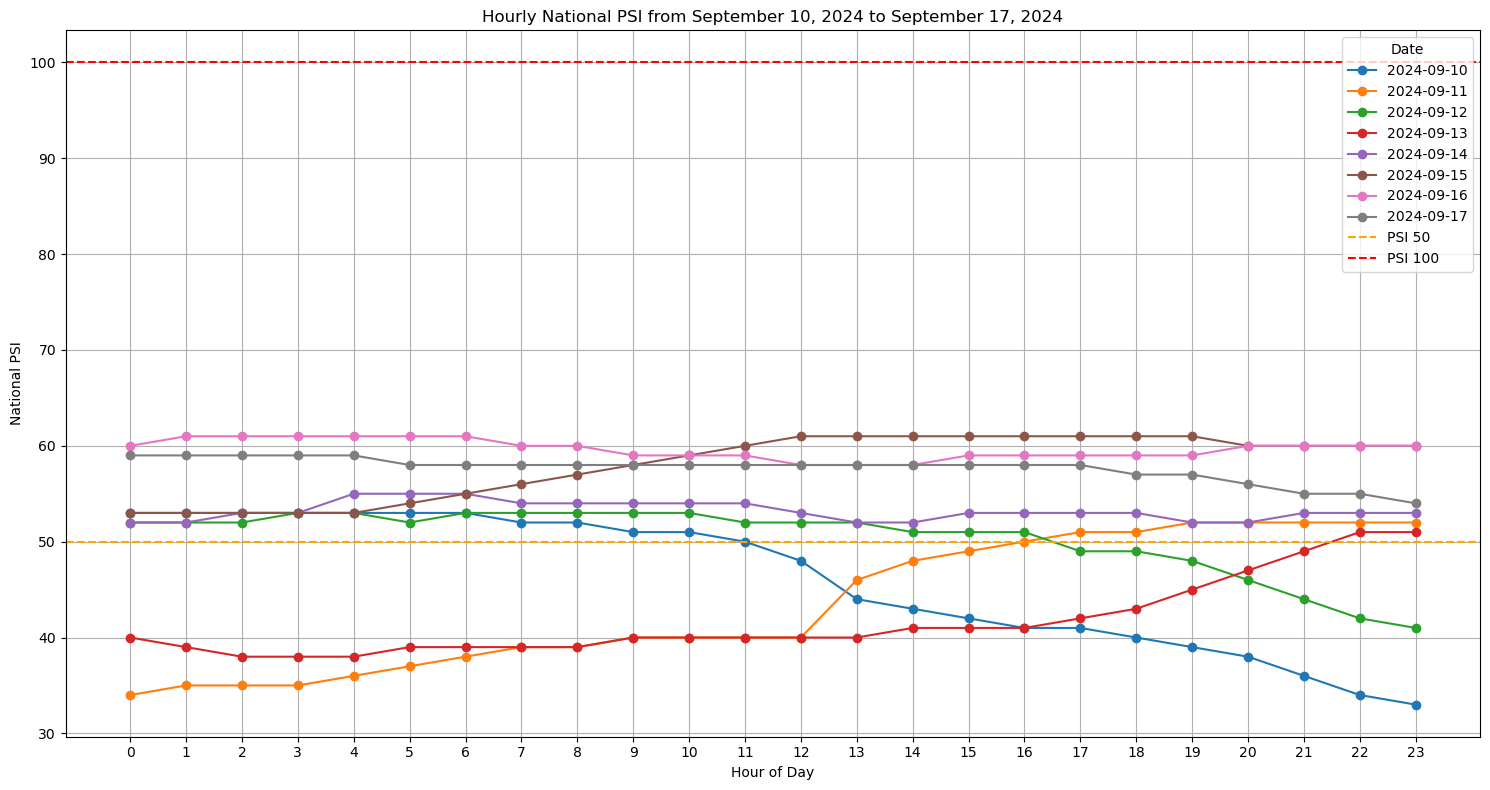

In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def fetch_psi_data(date_str):
    """
    Fetch PSI data for a specific date from the API.
    
    Args:
        date_str (str): Date in 'YYYY-MM-DD' format.
        
    Returns:
        dict: JSON response from the API if successful, else None.
    """
    url = f"https://api-open.data.gov.sg/v2/real-time/api/psi?date={date_str}"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        return data
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for {date_str}: {e}")
        return None

def extract_national_psi(data):
    """
    Extract national PSI (maximum PSI among all regions) from API data.
    
    Args:
        data (dict): JSON data from the API.
        
    Returns:
        list of dict: Each dict contains timestamp and national PSI.
    """
    records = []
    items = data.get("data", {}).get("items", [])
    for item in items:
        timestamp = item.get("timestamp")
        psi_readings = item.get("readings", {}).get("psi_twenty_four_hourly", {})
        # Extract PSI values for all regions
        west = psi_readings.get("west", 0)
        east = psi_readings.get("east", 0)
        central = psi_readings.get("central", 0)
        south = psi_readings.get("south", 0)
        north = psi_readings.get("north", 0)
        # Calculate national PSI as the maximum PSI among regions
        national_psi = max(west, east, central, south, north)
        records.append({
            "Timestamp": timestamp,
            "National_PSI": national_psi
        })
    return records

def save_to_csv(df, filename):
    """
    Save the DataFrame to a CSV file.
    
    Args:
        df (pd.DataFrame): DataFrame containing PSI data.
        filename (str): Name of the CSV file.
    """
    df.to_csv(filename, index=False, encoding='utf-8-sig')
    print(f"Data successfully saved to {filename}")

def visualize_psi(df):
    """
    Create a line chart with each day as a separate curve showing hourly PSI.
    
    Args:
        df (pd.DataFrame): DataFrame containing PSI data.
    """
    # Add a 'Date' and 'Hour' column for plotting
    df['Date'] = df['Timestamp'].dt.date
    df['Hour'] = df['Timestamp'].dt.hour

    # Pivot the DataFrame to have hours as x-axis and each day as a separate column
    pivot_df = df.pivot(index='Hour', columns='Date', values='National_PSI')

    plt.figure(figsize=(15, 8))

    # Plot each day's PSI data
    for date in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[date], marker='o', label=str(date))
    
    plt.title('Hourly National PSI from September 10, 2024 to September 17, 2024')
    plt.xlabel('Hour of Day')
    plt.ylabel('National PSI')
    plt.xticks(range(0, 24))  # Ensure x-axis has ticks for each hour
    plt.grid(True)
    plt.legend(title='Date')
    
    # Add horizontal reference lines based on PSI standards
    plt.axhline(y=50, color='orange', linestyle='--', label='PSI 50')
    plt.axhline(y=100, color='red', linestyle='--', label='PSI 100')
    
    # To prevent duplicate labels in the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), title='Date')
    
    plt.tight_layout()
    
    # Save the plot as a PNG file
    plt.savefig('national_psi_sept10_to_sept17.png')
    print("Visualization saved as 'national_psi_sept10_to_sept17.png'")
    plt.show()

def main():
    start_date = datetime.strptime("2024-09-10", "%Y-%m-%d")
    end_date = datetime.strptime("2024-09-17", "%Y-%m-%d")
    delta = timedelta(days=1)

    all_records = []

    current_date = start_date
    while current_date <= end_date:
        date_str = current_date.strftime("%Y-%m-%d")
        print(f"Fetching data for {date_str}...")
        data = fetch_psi_data(date_str)
        if data and data.get("code") == 0:
            records = extract_national_psi(data)
            all_records.extend(records)
            print(f"Successfully fetched data for {date_str}.")
        else:
            print(f"Failed to fetch data for {date_str}.")
        current_date += delta

    if not all_records:
        print("No data fetched. Exiting the program.")
        return

    # Create a DataFrame from the records
    df = pd.DataFrame(all_records)
    
    # Convert 'Timestamp' to datetime objects
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    # Sort the DataFrame by timestamp
    df.sort_values(by='Timestamp', inplace=True)
    
    # Save the data to a CSV file
    output_csv = "national_psi_sept10_to_sept17.csv"
    save_to_csv(df, output_csv)
    
    # Visualize the data
    visualize_psi(df)

if __name__ == "__main__":
    main()
 

Fetching data for 2024-09-01...
Successfully fetched data for 2024-09-01.
Fetching data for 2024-09-02...
Successfully fetched data for 2024-09-02.
Fetching data for 2024-09-03...
Successfully fetched data for 2024-09-03.
Fetching data for 2024-09-04...
Successfully fetched data for 2024-09-04.
Fetching data for 2024-09-05...
Successfully fetched data for 2024-09-05.
Fetching data for 2024-09-06...
Successfully fetched data for 2024-09-06.
Fetching data for 2024-09-07...
Successfully fetched data for 2024-09-07.
Fetching data for 2024-09-08...
Successfully fetched data for 2024-09-08.
Fetching data for 2024-09-09...
Successfully fetched data for 2024-09-09.
Fetching data for 2024-09-10...
Successfully fetched data for 2024-09-10.
Fetching data for 2024-09-11...
Successfully fetched data for 2024-09-11.
Fetching data for 2024-09-12...
Successfully fetched data for 2024-09-12.
Fetching data for 2024-09-13...
Successfully fetched data for 2024-09-13.
Fetching data for 2024-09-14...
Succes

/var/folders/0z/0_xs5pd10gggw9j_lcf9dpch0000gn/T/ipykernel_16183/3748051864.py:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(pivot_df.columns))


Visualization saved as 'national_psi_sept10_to_sept17_enhanced.png'


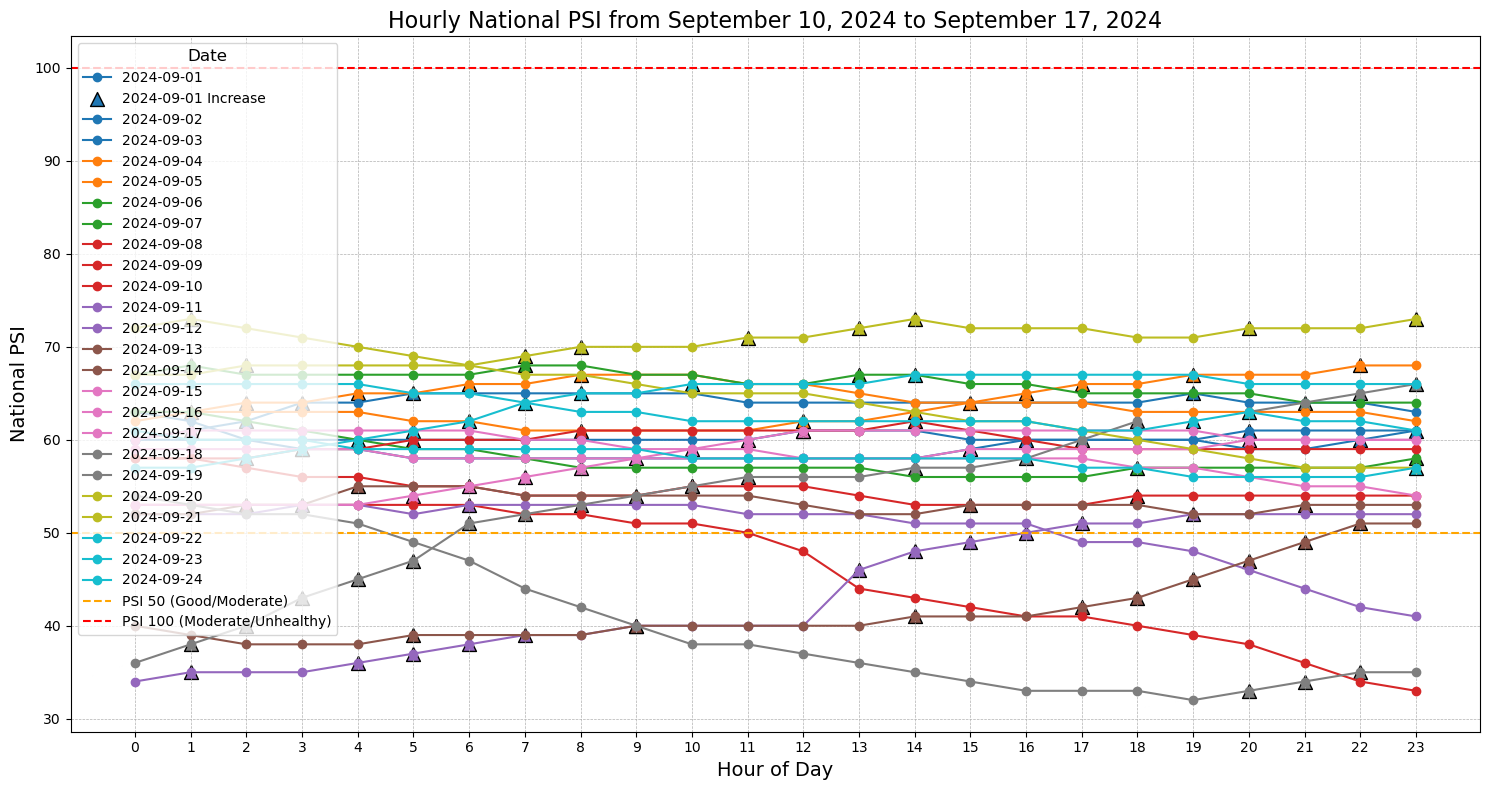

In [10]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates

def fetch_psi_data(date_str):
    """
    Fetch PSI data for a specific date from the API.
    
    Args:
        date_str (str): Date in 'YYYY-MM-DD' format.
        
    Returns:
        dict: JSON response from the API if successful, else None.
    """
    url = f"https://api-open.data.gov.sg/v2/real-time/api/psi?date={date_str}"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        return data
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for {date_str}: {e}")
        return None

def extract_national_psi(data):
    """
    Extract national PSI (maximum PSI among all regions) from API data.
    
    Args:
        data (dict): JSON data from the API.
        
    Returns:
        list of dict: Each dict contains timestamp and national PSI.
    """
    records = []
    items = data.get("data", {}).get("items", [])
    for item in items:
        timestamp = item.get("timestamp")
        psi_readings = item.get("readings", {}).get("psi_twenty_four_hourly", {})
        # Extract PSI values for all regions
        west = psi_readings.get("west", 0)
        east = psi_readings.get("east", 0)
        central = psi_readings.get("central", 0)
        south = psi_readings.get("south", 0)
        north = psi_readings.get("north", 0)
        # Calculate national PSI as the maximum PSI among regions
        national_psi = max(west, east, central, south, north)
        records.append({
            "Timestamp": timestamp,
            "National_PSI": national_psi
        })
    return records

def save_to_csv(df, filename):
    """
    Save the DataFrame to a CSV file.
    
    Args:
        df (pd.DataFrame): DataFrame containing PSI data.
        filename (str): Name of the CSV file.
    """
    df.to_csv(filename, index=False, encoding='utf-8-sig')
    print(f"Data successfully saved to {filename}")

def visualize_psi(df):
    """
    Create a line chart with each day as a separate curve showing hourly PSI.
    Marks points where PSI is increasing compared to the previous hour.
    
    Args:
        df (pd.DataFrame): DataFrame containing PSI data.
    """
    # Add a 'Date' and 'Hour' column for plotting
    df['Date'] = df['Timestamp'].dt.date
    df['Hour'] = df['Timestamp'].dt.hour

    # Pivot the DataFrame to have hours as x-axis and each day as a separate column
    pivot_df = df.pivot(index='Hour', columns='Date', values='National_PSI')

    plt.figure(figsize=(15, 8))

    # Define a color palette
    colors = plt.cm.get_cmap('tab10', len(pivot_df.columns))

    # Plot each day's PSI data
    for idx, date in enumerate(pivot_df.columns):
        plt.plot(pivot_df.index, pivot_df[date], marker='o', linestyle='-', label=str(date), color=colors(idx))
        
        # Identify points where PSI is increasing compared to the previous hour
        psi_values = pivot_df[date].values
        increasing_hours = []
        increasing_psis = []
        for hour in range(1, len(psi_values)):
            if psi_values[hour] > psi_values[hour - 1]:
                increasing_hours.append(hour)
                increasing_psis.append(psi_values[hour])
        
        # Mark the increasing points with upward arrows
        plt.scatter(increasing_hours, increasing_psis, color=colors(idx), marker='^', s=100, edgecolors='k', label=f'{date} Increase' if idx == 0 else "")

    plt.title('Hourly National PSI from September 10, 2024 to September 17, 2024', fontsize=16)
    plt.xlabel('Hour of Day', fontsize=14)
    plt.ylabel('National PSI', fontsize=14)
    plt.xticks(range(0, 24))  # Ensure x-axis has ticks for each hour
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Add horizontal reference lines based on PSI standards
    plt.axhline(y=50, color='orange', linestyle='--', label='PSI 50 (Good/Moderate)')
    plt.axhline(y=100, color='red', linestyle='--', label='PSI 100 (Moderate/Unhealthy)')
    
    # Create a custom legend to avoid duplicate labels
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), title='Date', fontsize=10, title_fontsize=12)
    
    plt.tight_layout()
    
    # Save the plot as a PNG file
    plt.savefig('national_psi_sept10_to_sept17_enhanced.png')
    print("Visualization saved as 'national_psi_sept10_to_sept17_enhanced.png'")
    plt.show()

def main():
    start_date = datetime.strptime("2024-09-01", "%Y-%m-%d")
    end_date = datetime.strptime("2024-09-24", "%Y-%m-%d")
    delta = timedelta(days=1)

    all_records = []

    current_date = start_date
    while current_date <= end_date:
        date_str = current_date.strftime("%Y-%m-%d")
        print(f"Fetching data for {date_str}...")
        data = fetch_psi_data(date_str)
        if data and data.get("code") == 0:
            records = extract_national_psi(data)
            all_records.extend(records)
            print(f"Successfully fetched data for {date_str}.")
        else:
            print(f"Failed to fetch data for {date_str}.")
        current_date += delta

    if not all_records:
        print("No data fetched. Exiting the program.")
        return

    # Create a DataFrame from the records
    df = pd.DataFrame(all_records)
    
    # Convert 'Timestamp' to datetime objects
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    # Sort the DataFrame by timestamp
    df.sort_values(by='Timestamp', inplace=True)
    
    # Save the data to a CSV file
    output_csv = "national_psi_sept10_to_sept17.csv"
    save_to_csv(df, output_csv)
    
    # Visualize the data
    visualize_psi(df)

if __name__ == "__main__":
    main()


Fetching data for 2024-09-01...
Successfully fetched data for 2024-09-01.
Fetching data for 2024-09-02...
Successfully fetched data for 2024-09-02.
Fetching data for 2024-09-03...
Successfully fetched data for 2024-09-03.
Fetching data for 2024-09-04...
Successfully fetched data for 2024-09-04.
Fetching data for 2024-09-05...
Successfully fetched data for 2024-09-05.
Fetching data for 2024-09-06...
Successfully fetched data for 2024-09-06.
Fetching data for 2024-09-07...
Successfully fetched data for 2024-09-07.
Fetching data for 2024-09-08...
Successfully fetched data for 2024-09-08.
Fetching data for 2024-09-09...
Successfully fetched data for 2024-09-09.
Fetching data for 2024-09-10...
Successfully fetched data for 2024-09-10.
Fetching data for 2024-09-11...
Successfully fetched data for 2024-09-11.
Fetching data for 2024-09-12...
Successfully fetched data for 2024-09-12.
Fetching data for 2024-09-13...
Successfully fetched data for 2024-09-13.
Fetching data for 2024-09-14...
Succes

/var/folders/0z/0_xs5pd10gggw9j_lcf9dpch0000gn/T/ipykernel_16183/1019055132.py:124: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_dates)


Visualization saved as 'national_metrics_sept01_to_sept24_enhanced.png'


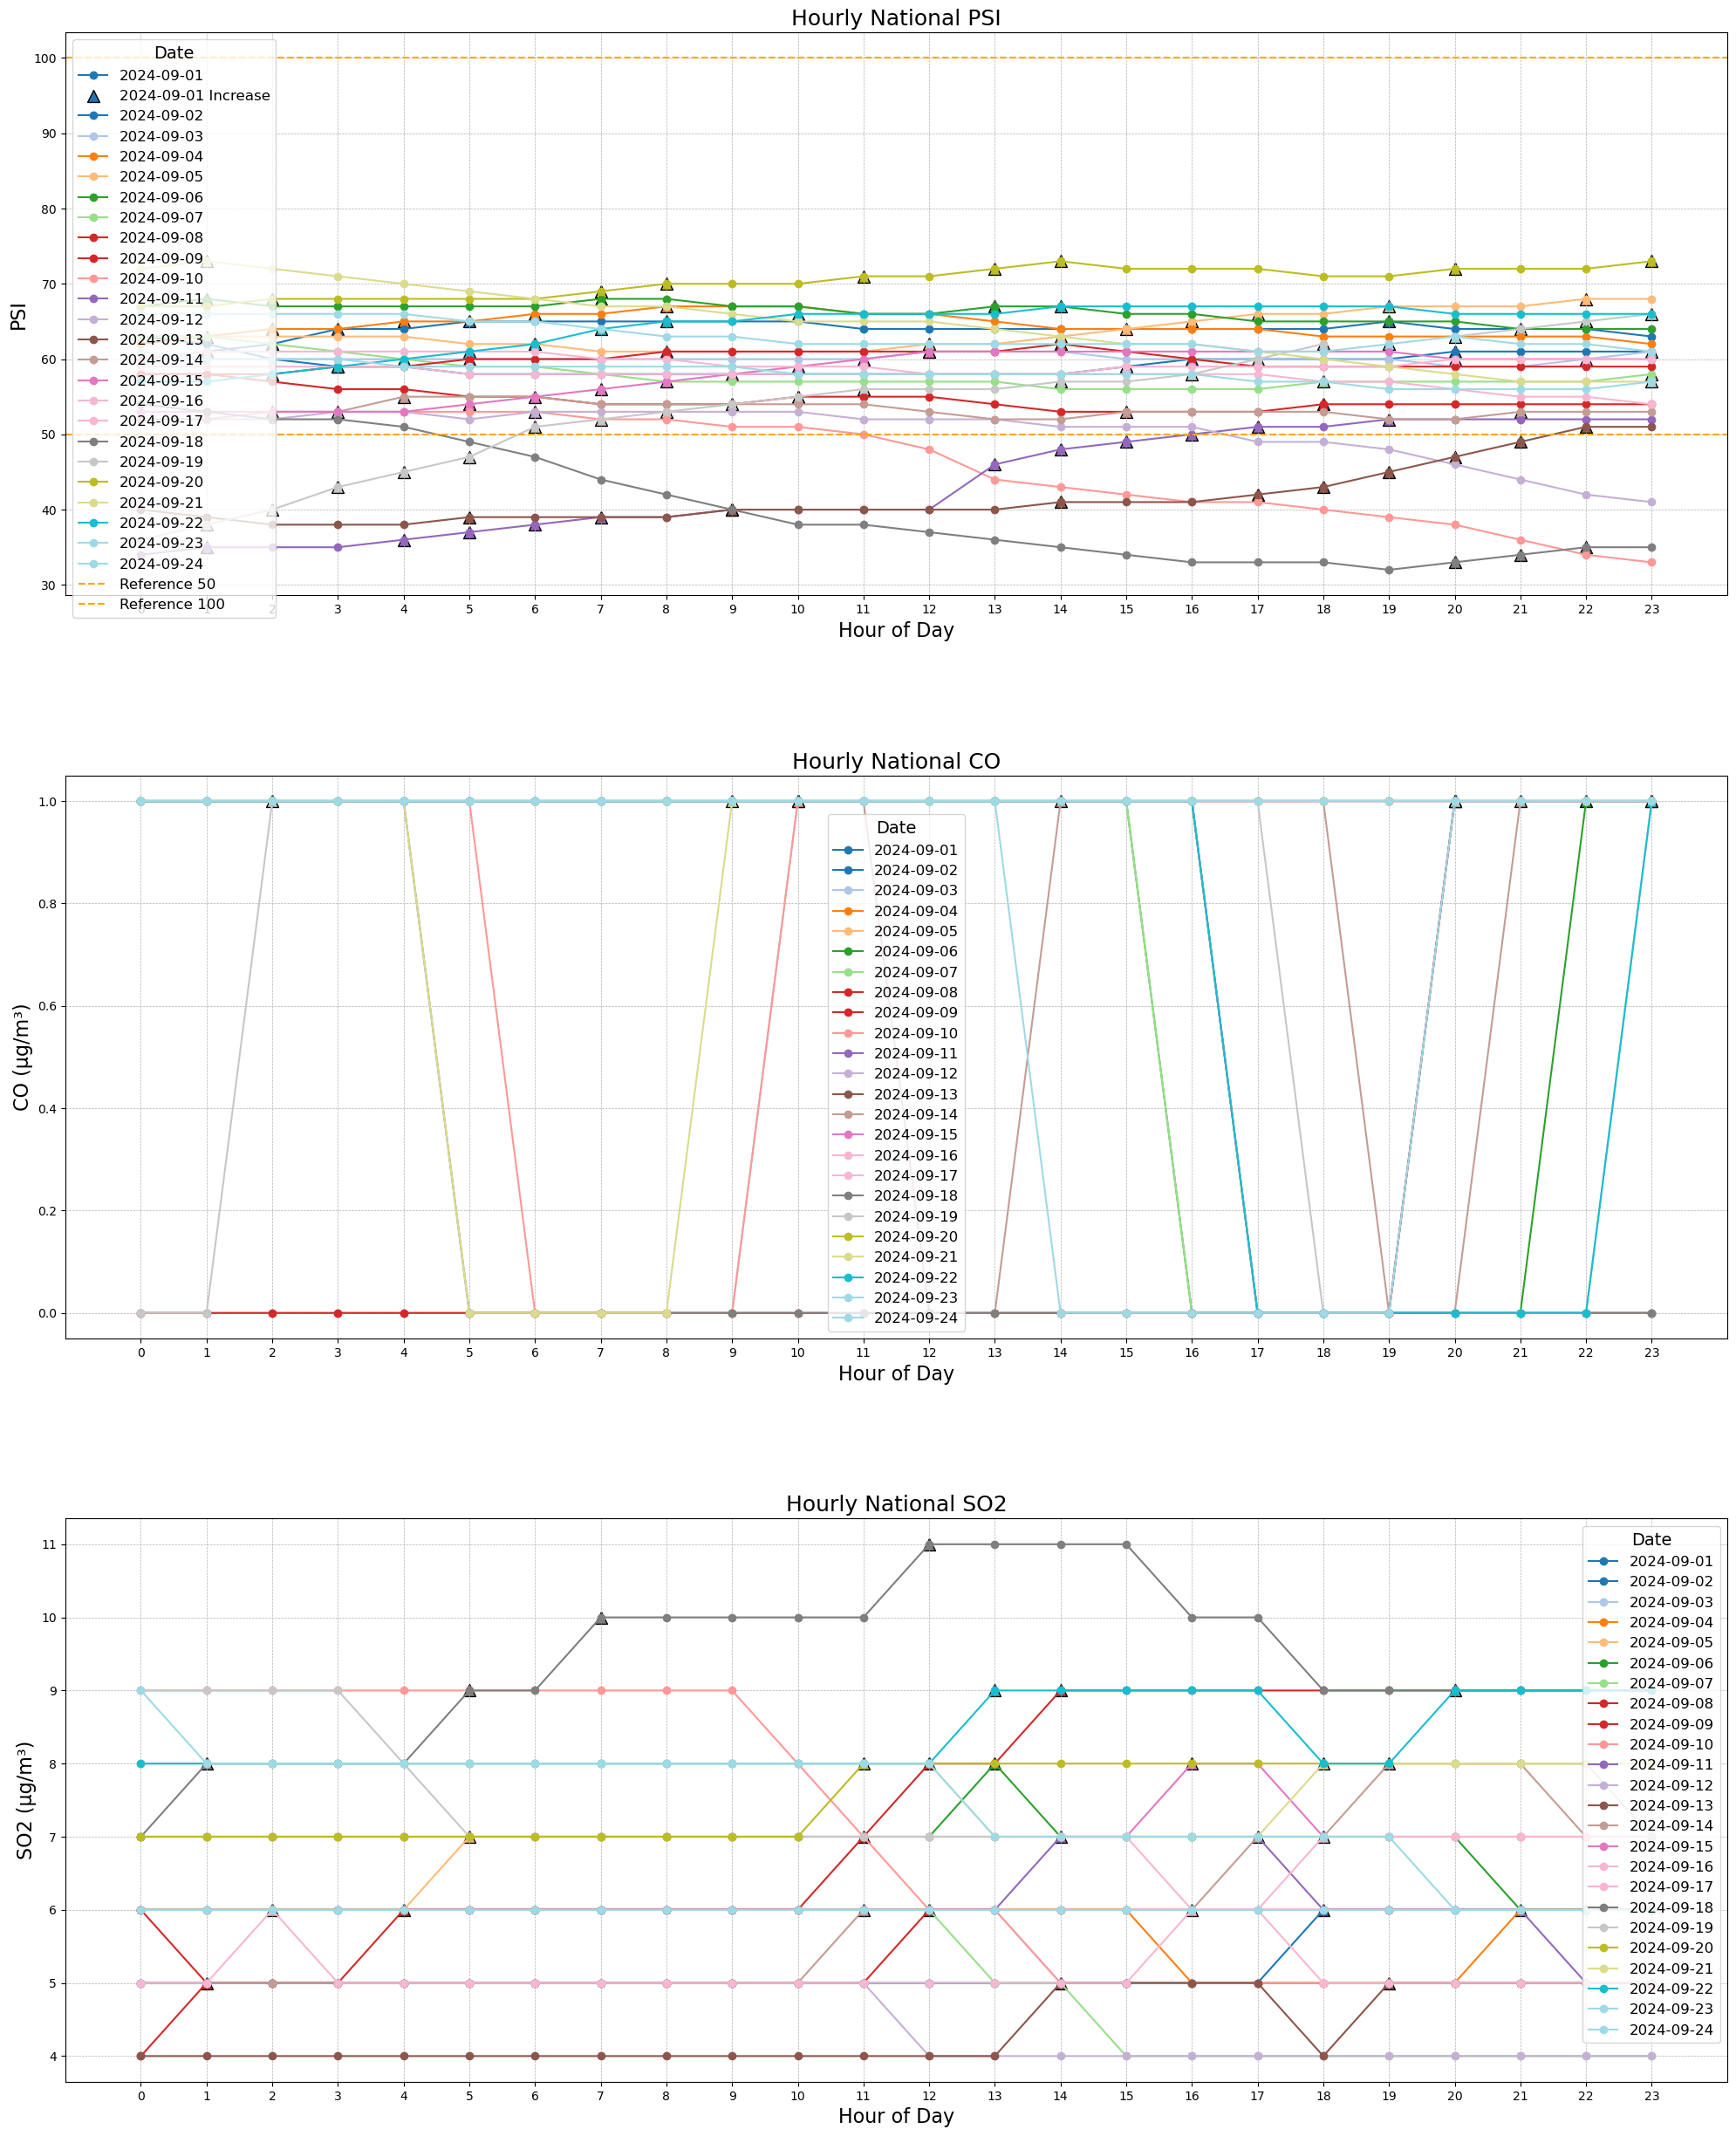

In [12]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def fetch_psi_data(date_str):
    """
    Fetch PSI, CO, and SO2 data for a specific date from the API.

    Args:
        date_str (str): Date in 'YYYY-MM-DD' format.

    Returns:
        dict: JSON response from the API if successful, else None.
    """
    url = f"https://api-open.data.gov.sg/v2/real-time/api/psi?date={date_str}"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        return data
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for {date_str}: {e}")
        return None

def extract_national_metrics(data):
    """
    Extract National PSI, CO, and SO2 (maximum values among all regions) from API data.

    Args:
        data (dict): JSON data from the API.

    Returns:
        list of dict: Each dict contains timestamp, National_PSI, National_CO, National_SO2.
    """
    records = []
    items = data.get("data", {}).get("items", [])
    for item in items:
        timestamp = item.get("timestamp")
        readings = item.get("readings", {})
        
        # Extract PSI values for all regions and calculate National PSI
        psi_readings = readings.get("psi_twenty_four_hourly", {})
        west_psi = psi_readings.get("west", 0)
        east_psi = psi_readings.get("east", 0)
        central_psi = psi_readings.get("central", 0)
        south_psi = psi_readings.get("south", 0)
        north_psi = psi_readings.get("north", 0)
        national_psi = max(west_psi, east_psi, central_psi, south_psi, north_psi)
        
        # Extract CO values for all regions and calculate National CO
        # The API might provide 'co_twenty_four_hourly' or 'co_eight_hour_max'
        co_readings = readings.get("co_twenty_four_hourly")
        if not co_readings:
            co_readings = readings.get("co_eight_hour_max", {})
        west_co = co_readings.get("west", 0)
        east_co = co_readings.get("east", 0)
        central_co = co_readings.get("central", 0)
        south_co = co_readings.get("south", 0)
        north_co = co_readings.get("north", 0)
        national_co = max(west_co, east_co, central_co, south_co, north_co)
        
        # Extract SO2 values for all regions and calculate National SO2
        so2_readings = readings.get("so2_twenty_four_hourly", {})
        west_so2 = so2_readings.get("west", 0)
        east_so2 = so2_readings.get("east", 0)
        central_so2 = so2_readings.get("central", 0)
        south_so2 = so2_readings.get("south", 0)
        north_so2 = so2_readings.get("north", 0)
        national_so2 = max(west_so2, east_so2, central_so2, south_so2, north_so2)
        
        records.append({
            "Timestamp": timestamp,
            "National_PSI": national_psi,
            "National_CO": national_co,
            "National_SO2": national_so2
        })
    return records

def save_to_csv(df, filename):
    """
    Save the DataFrame to a CSV file.

    Args:
        df (pd.DataFrame): DataFrame containing PSI, CO, SO2 data.
        filename (str): Name of the CSV file.
    """
    df.to_csv(filename, index=False, encoding='utf-8-sig')
    print(f"Data successfully saved to {filename}")

def visualize_metrics(df):
    """
    Create line charts for PSI, CO, and SO2 with each day as a separate curve.
    Marks points where values are increasing compared to the previous hour.

    Args:
        df (pd.DataFrame): DataFrame containing PSI, CO, SO2 data.
    """
    # Add 'Date' and 'Hour' columns
    df['Date'] = df['Timestamp'].dt.date
    df['Hour'] = df['Timestamp'].dt.hour

    # Define metrics to visualize
    metrics = ['National_PSI', 'National_CO', 'National_SO2']
    metric_titles = {
        'National_PSI': 'Hourly National PSI',
        'National_CO': 'Hourly National CO',
        'National_SO2': 'Hourly National SO2'
    }
    y_labels = {
        'National_PSI': 'PSI',
        'National_CO': 'CO (µg/m³)',
        'National_SO2': 'SO2 (µg/m³)'
    }
    reference_lines = {
        'National_PSI': [50, 100],
        'National_CO': [],
        'National_SO2': []
    }

    # Get list of unique dates sorted
    dates = sorted(df['Date'].unique())
    num_dates = len(dates)
    colors = plt.cm.get_cmap('tab20', num_dates)

    # Create subplots
    fig, axes = plt.subplots(3, 1, figsize=(20, 25))
    fig.subplots_adjust(hspace=0.4)

    for idx, metric in enumerate(metrics):
        ax = axes[idx]
        pivot = df.pivot(index='Hour', columns='Date', values=metric)
        
        for i, date in enumerate(dates):
            ax.plot(pivot.index, pivot[date], marker='o', linestyle='-', label=str(date), color=colors(i))
            
            # Identify points where the metric is increasing compared to the previous hour
            metric_values = pivot[date].values
            increasing_hours = []
            increasing_values = []
            for hour in range(1, len(metric_values)):
                if metric_values[hour] > metric_values[hour - 1]:
                    increasing_hours.append(hour)
                    increasing_values.append(metric_values[hour])
            
            # Mark the increasing points with upward arrows
            ax.scatter(increasing_hours, increasing_values, color=colors(i), marker='^', s=100, edgecolors='k', label=f'{date} Increase' if idx == 0 and i == 0 else "")
        
        ax.set_title(metric_titles[metric], fontsize=18)
        ax.set_xlabel('Hour of Day', fontsize=16)
        ax.set_ylabel(y_labels[metric], fontsize=16)
        ax.set_xticks(range(0, 24))
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        
        # Add reference lines if any
        for ref in reference_lines[metric]:
            ax.axhline(y=ref, color='orange', linestyle='--', label=f'Reference {ref}')
        
        # Create a custom legend to avoid duplicate labels
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys(), title='Date', fontsize=12, title_fontsize=14)
    
    plt.tight_layout()
    
    # Save the plot as a PNG file
    plt.savefig('national_metrics_sept01_to_sept24_enhanced.png')
    print("Visualization saved as 'national_metrics_sept01_to_sept24_enhanced.png'")
    plt.show()

def main():
    start_date = datetime.strptime("2024-09-01", "%Y-%m-%d")
    end_date = datetime.strptime("2024-09-24", "%Y-%m-%d")
    delta = timedelta(days=1)

    all_records = []

    current_date = start_date
    while current_date <= end_date:
        date_str = current_date.strftime("%Y-%m-%d")
        print(f"Fetching data for {date_str}...")
        data = fetch_psi_data(date_str)
        if data and data.get("code") == 0:
            records = extract_national_metrics(data)
            all_records.extend(records)
            print(f"Successfully fetched data for {date_str}.")
        else:
            print(f"Failed to fetch data for {date_str}.")
        current_date += delta

    if not all_records:
        print("No data fetched. Exiting the program.")
        return

    # Create a DataFrame from the records
    df = pd.DataFrame(all_records)
    
    # Convert 'Timestamp' to datetime objects
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    # Sort the DataFrame by timestamp
    df.sort_values(by='Timestamp', inplace=True)
    
    # Save the data to a CSV file
    output_csv = "national_metrics_sept01_to_sept24.csv"
    save_to_csv(df, output_csv)
    
    # Visualize the data
    visualize_metrics(df)

if __name__ == "__main__":
    main()


Fetching data for 2024-09-01...
Successfully fetched data for 2024-09-01.
Fetching data for 2024-09-02...
Successfully fetched data for 2024-09-02.
Fetching data for 2024-09-03...
Successfully fetched data for 2024-09-03.
Fetching data for 2024-09-04...
Successfully fetched data for 2024-09-04.
Fetching data for 2024-09-05...
Successfully fetched data for 2024-09-05.
Fetching data for 2024-09-06...
Successfully fetched data for 2024-09-06.
Fetching data for 2024-09-07...
Successfully fetched data for 2024-09-07.
Fetching data for 2024-09-08...
Successfully fetched data for 2024-09-08.
Fetching data for 2024-09-09...
Successfully fetched data for 2024-09-09.
Fetching data for 2024-09-10...
Successfully fetched data for 2024-09-10.
Fetching data for 2024-09-11...
Successfully fetched data for 2024-09-11.
Fetching data for 2024-09-12...
Successfully fetched data for 2024-09-12.
Fetching data for 2024-09-13...
Successfully fetched data for 2024-09-13.
Fetching data for 2024-09-14...
Succes

/var/folders/0z/0_xs5pd10gggw9j_lcf9dpch0000gn/T/ipykernel_16183/2632149314.py:130: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


Visualization saved as 'regions_psi_sept01_to_sept24.png'


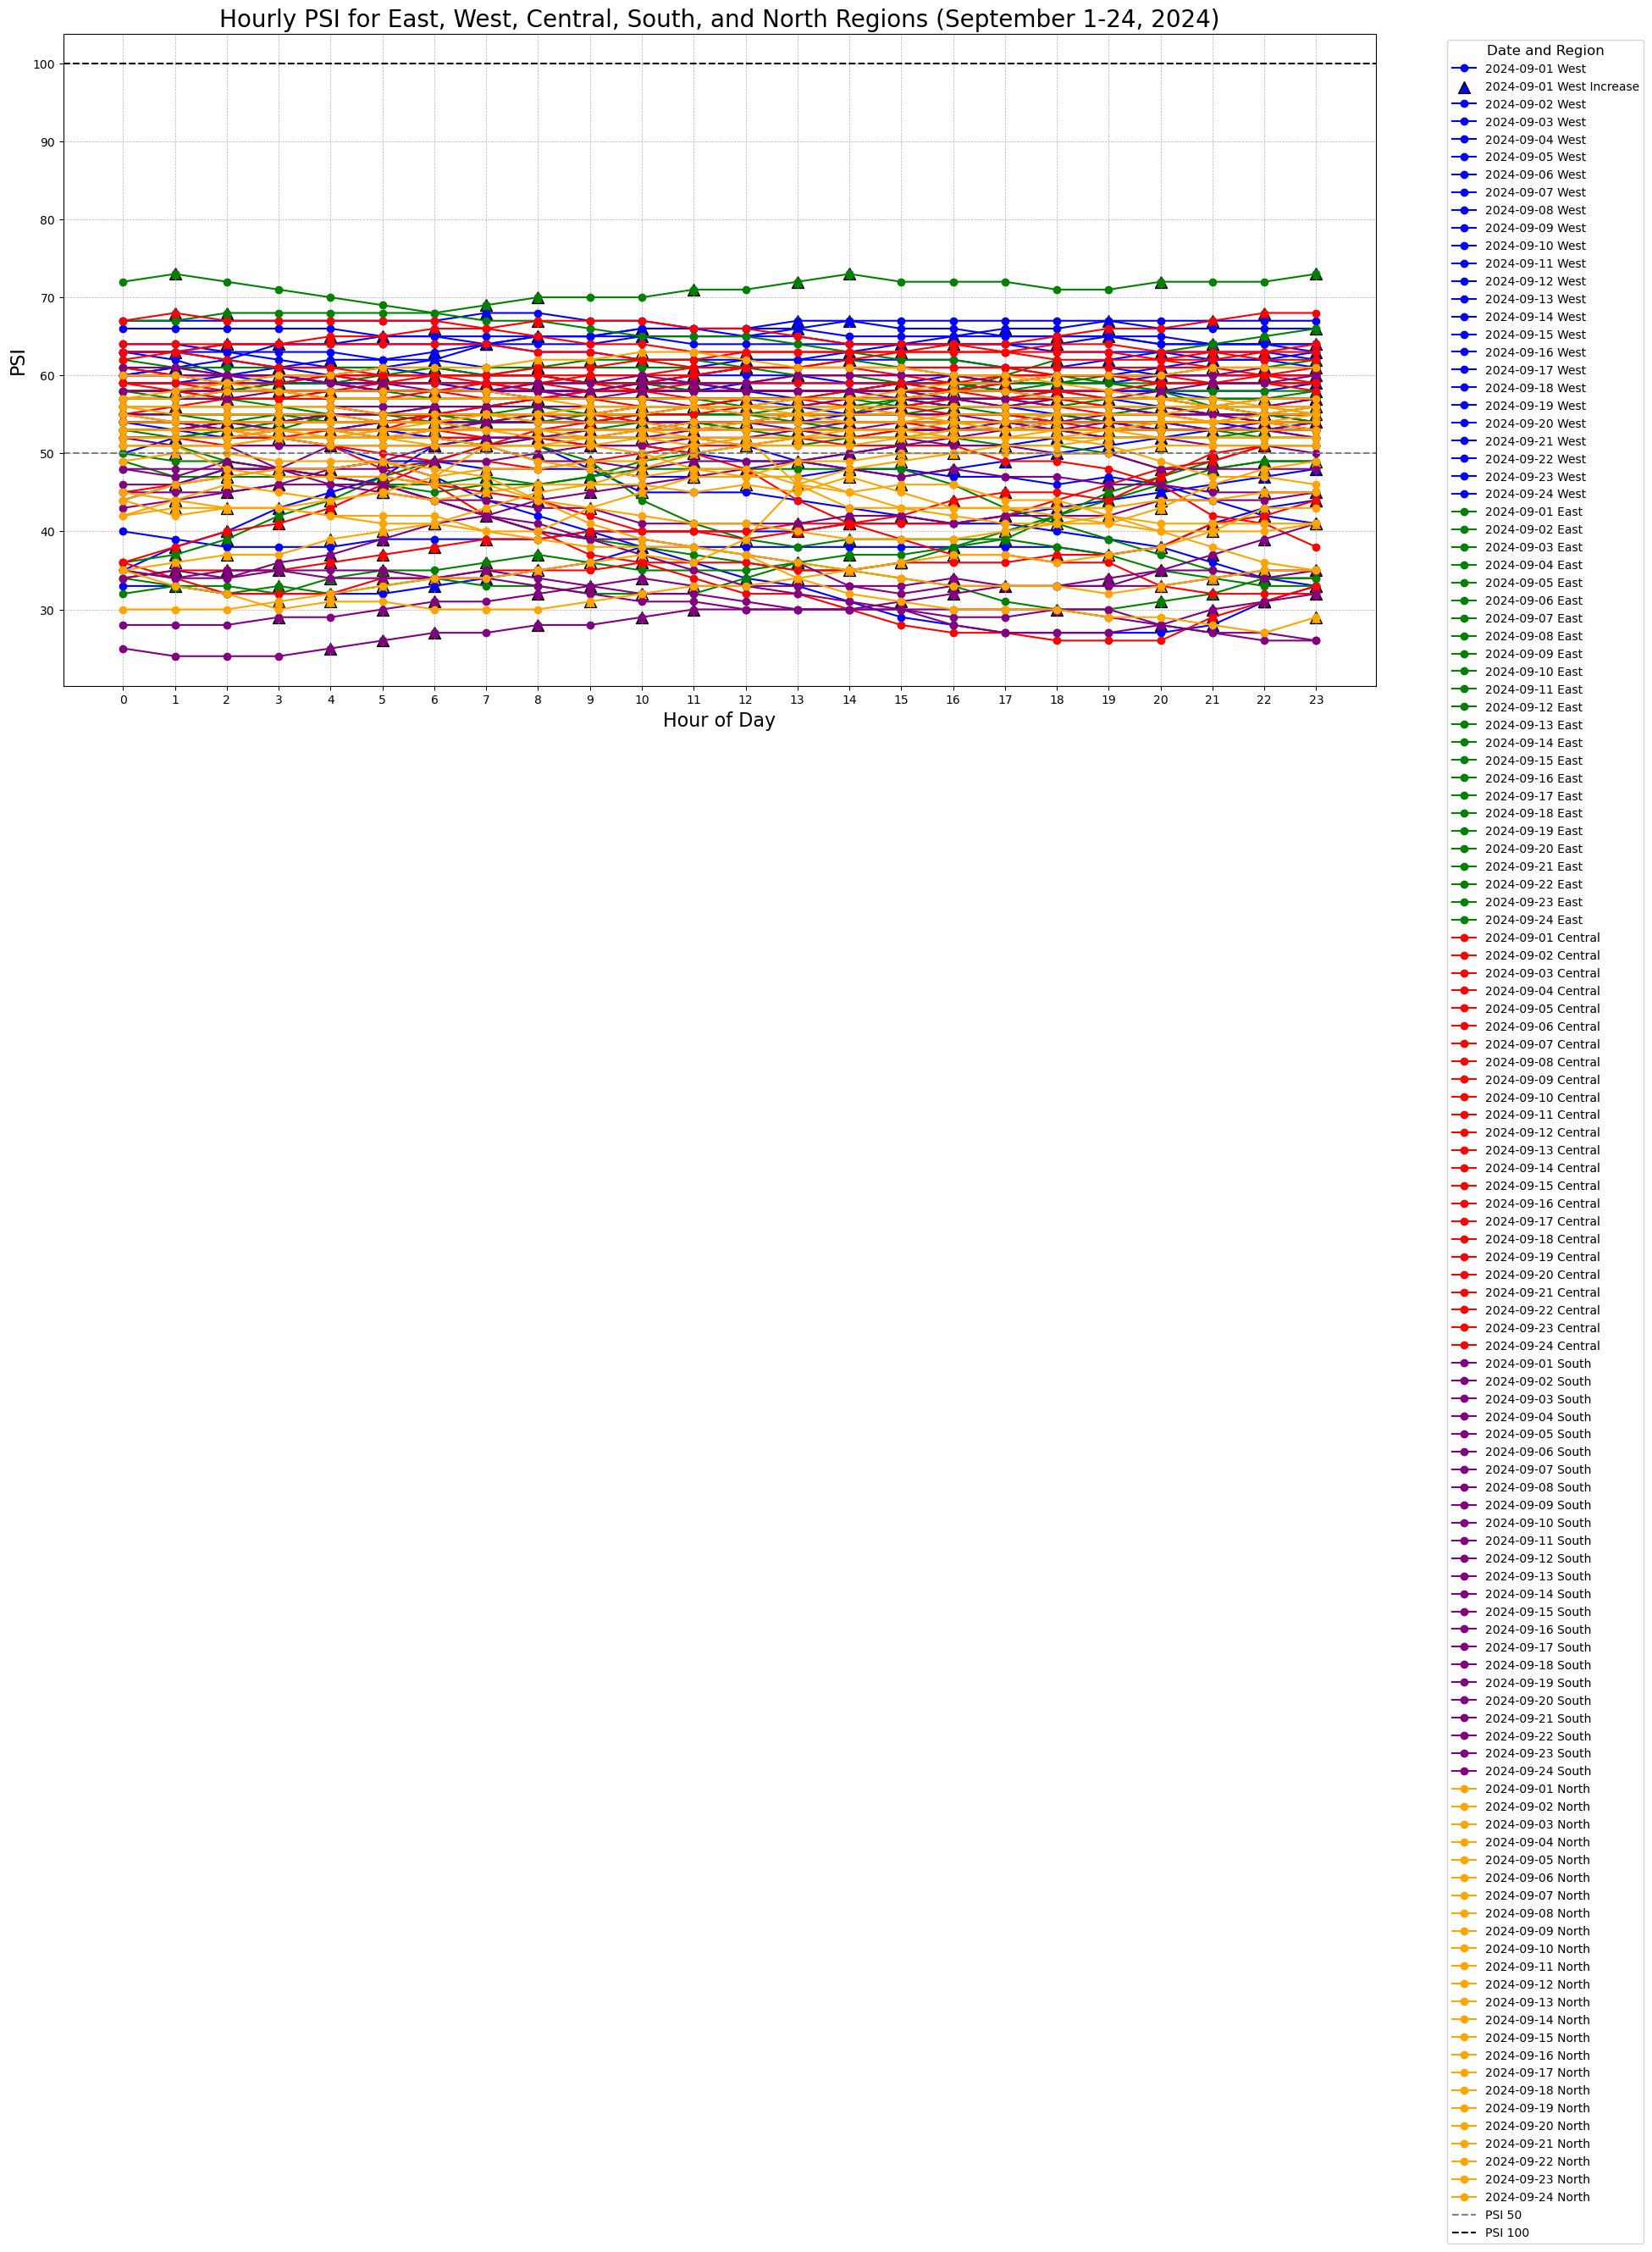

In [14]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def fetch_psi_data(date_str):
    """
    Fetch PSI data for a specific date from the API.
    
    Args:
        date_str (str): Date in 'YYYY-MM-DD' format.
        
    Returns:
        dict: JSON response from the API if successful, else None.
    """
    url = f"https://api-open.data.gov.sg/v2/real-time/api/psi?date={date_str}"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        return data
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for {date_str}: {e}")
        return None

def extract_regions_psi(data):
    """
    Extract PSI values for East, West, Central, South, and North regions from API data.
    
    Args:
        data (dict): JSON data from the API.
        
    Returns:
        list of dict: Each dict contains timestamp and PSI values for all regions.
    """
    records = []
    items = data.get("data", {}).get("items", [])
    for item in items:
        timestamp = item.get("timestamp")
        psi_readings = item.get("readings", {}).get("psi_twenty_four_hourly", {})
        # Extract PSI values for all regions
        west = psi_readings.get("west", None)
        east = psi_readings.get("east", None)
        central = psi_readings.get("central", None)
        south = psi_readings.get("south", None)
        north = psi_readings.get("north", None)
        records.append({
            "Timestamp": timestamp,
            "West_PSI": west,
            "East_PSI": east,
            "Central_PSI": central,
            "South_PSI": south,
            "North_PSI": north
        })
    return records

def save_to_csv(df, filename):
    """
    Save the DataFrame to a CSV file.
    
    Args:
        df (pd.DataFrame): DataFrame containing PSI data.
        filename (str): Name of the CSV file.
    """
    df.to_csv(filename, index=False, encoding='utf-8-sig')
    print(f"Data successfully saved to {filename}")

def visualize_regions_psi(df):
    """
    Create a line chart showing hourly PSI for East, West, Central, South, and North regions.
    Marks points where PSI values are increasing compared to the previous hour.
    
    Args:
        df (pd.DataFrame): DataFrame containing PSI data.
    """
    # Convert 'Timestamp' to datetime objects
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    # Add 'Date' and 'Hour' columns
    df['Date'] = df['Timestamp'].dt.date
    df['Hour'] = df['Timestamp'].dt.hour
    
    # Define regions
    regions = ['West_PSI', 'East_PSI', 'Central_PSI', 'South_PSI', 'North_PSI']
    region_colors = {
        'West_PSI': 'blue',
        'East_PSI': 'green',
        'Central_PSI': 'red',
        'South_PSI': 'purple',
        'North_PSI': 'orange'
    }
    
    plt.figure(figsize=(20, 10))
    
    for region in regions:
        # Pivot the DataFrame to have hours as x-axis and each day as a separate column
        pivot_df = df.pivot(index='Hour', columns='Date', values=region)
        
        # Plot each day's data for the region
        for date in pivot_df.columns:
            plt.plot(pivot_df.index, pivot_df[date], marker='o', linestyle='-', label=f"{date} {region[:-4]}", color=region_colors[region])
            
            # Identify points where PSI is increasing compared to the previous hour
            psi_values = pivot_df[date].values
            increasing_hours = []
            increasing_psis = []
            for hour in range(1, len(psi_values)):
                if psi_values[hour] > psi_values[hour - 1]:
                    increasing_hours.append(hour)
                    increasing_psis.append(psi_values[hour])
            
            # Mark the increasing points with upward arrows
            plt.scatter(increasing_hours, increasing_psis, color=region_colors[region], marker='^', s=100, edgecolors='k', label=f"{date} {region[:-4]} Increase" if region == regions[0] and date == pivot_df.columns[0] else "")
    
    plt.title('Hourly PSI for East, West, Central, South, and North Regions (September 1-24, 2024)', fontsize=20)
    plt.xlabel('Hour of Day', fontsize=16)
    plt.ylabel('PSI', fontsize=16)
    plt.xticks(range(0, 24))
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Add horizontal reference lines based on PSI standards
    plt.axhline(y=50, color='grey', linestyle='--', label='PSI 50')
    plt.axhline(y=100, color='black', linestyle='--', label='PSI 100')
    
    # To prevent duplicate labels in the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), title='Date and Region', fontsize=10, title_fontsize=12, loc='upper left', bbox_to_anchor=(1.05, 1))
    
    plt.tight_layout()
    
    # Save the plot as a PNG file
    plt.savefig('regions_psi_sept01_to_sept24.png', bbox_inches='tight')
    print("Visualization saved as 'regions_psi_sept01_to_sept24.png'")
    plt.show()

def main():
    start_date = datetime.strptime("2024-09-01", "%Y-%m-%d")
    end_date = datetime.strptime("2024-09-24", "%Y-%m-%d")
    delta = timedelta(days=1)

    all_records = []

    current_date = start_date
    while current_date <= end_date:
        date_str = current_date.strftime("%Y-%m-%d")
        print(f"Fetching data for {date_str}...")
        data = fetch_psi_data(date_str)
        if data and data.get("code") == 0:
            records = extract_regions_psi(data)
            all_records.extend(records)
            print(f"Successfully fetched data for {date_str}.")
        else:
            print(f"Failed to fetch data for {date_str}.")
        current_date += delta

    if not all_records:
        print("No data fetched. Exiting the program.")
        return

    # Create a DataFrame from the records
    df = pd.DataFrame(all_records)
    
    # Convert 'Timestamp' to datetime objects
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    # Sort the DataFrame by timestamp
    df.sort_values(by='Timestamp', inplace=True)
    
    # Save the data to a CSV file
    output_csv = "regions_psi_sept01_to_sept24.csv"
    save_to_csv(df, output_csv)
    
    # Visualize the data
    visualize_regions_psi(df)

if __name__ == "__main__":
    main()


Fetching data for 2024-08-01...
Successfully fetched data for 2024-08-01.
Fetching data for 2024-08-02...
Successfully fetched data for 2024-08-02.
Fetching data for 2024-08-03...
Successfully fetched data for 2024-08-03.
Fetching data for 2024-08-04...
Successfully fetched data for 2024-08-04.
Fetching data for 2024-08-05...
Successfully fetched data for 2024-08-05.
Fetching data for 2024-08-06...
Successfully fetched data for 2024-08-06.
Fetching data for 2024-08-07...
Successfully fetched data for 2024-08-07.
Fetching data for 2024-08-08...
Successfully fetched data for 2024-08-08.
Fetching data for 2024-08-09...
Successfully fetched data for 2024-08-09.
Fetching data for 2024-08-10...
Successfully fetched data for 2024-08-10.
Fetching data for 2024-08-11...
Successfully fetched data for 2024-08-11.
Fetching data for 2024-08-12...
Successfully fetched data for 2024-08-12.
Fetching data for 2024-08-13...
Successfully fetched data for 2024-08-13.
Fetching data for 2024-08-14...
Succes

/var/folders/0z/0_xs5pd10gggw9j_lcf9dpch0000gn/T/ipykernel_16183/3612873314.py:146: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_dates)


IndexError: index 0 is out of bounds for axis 0 with size 0

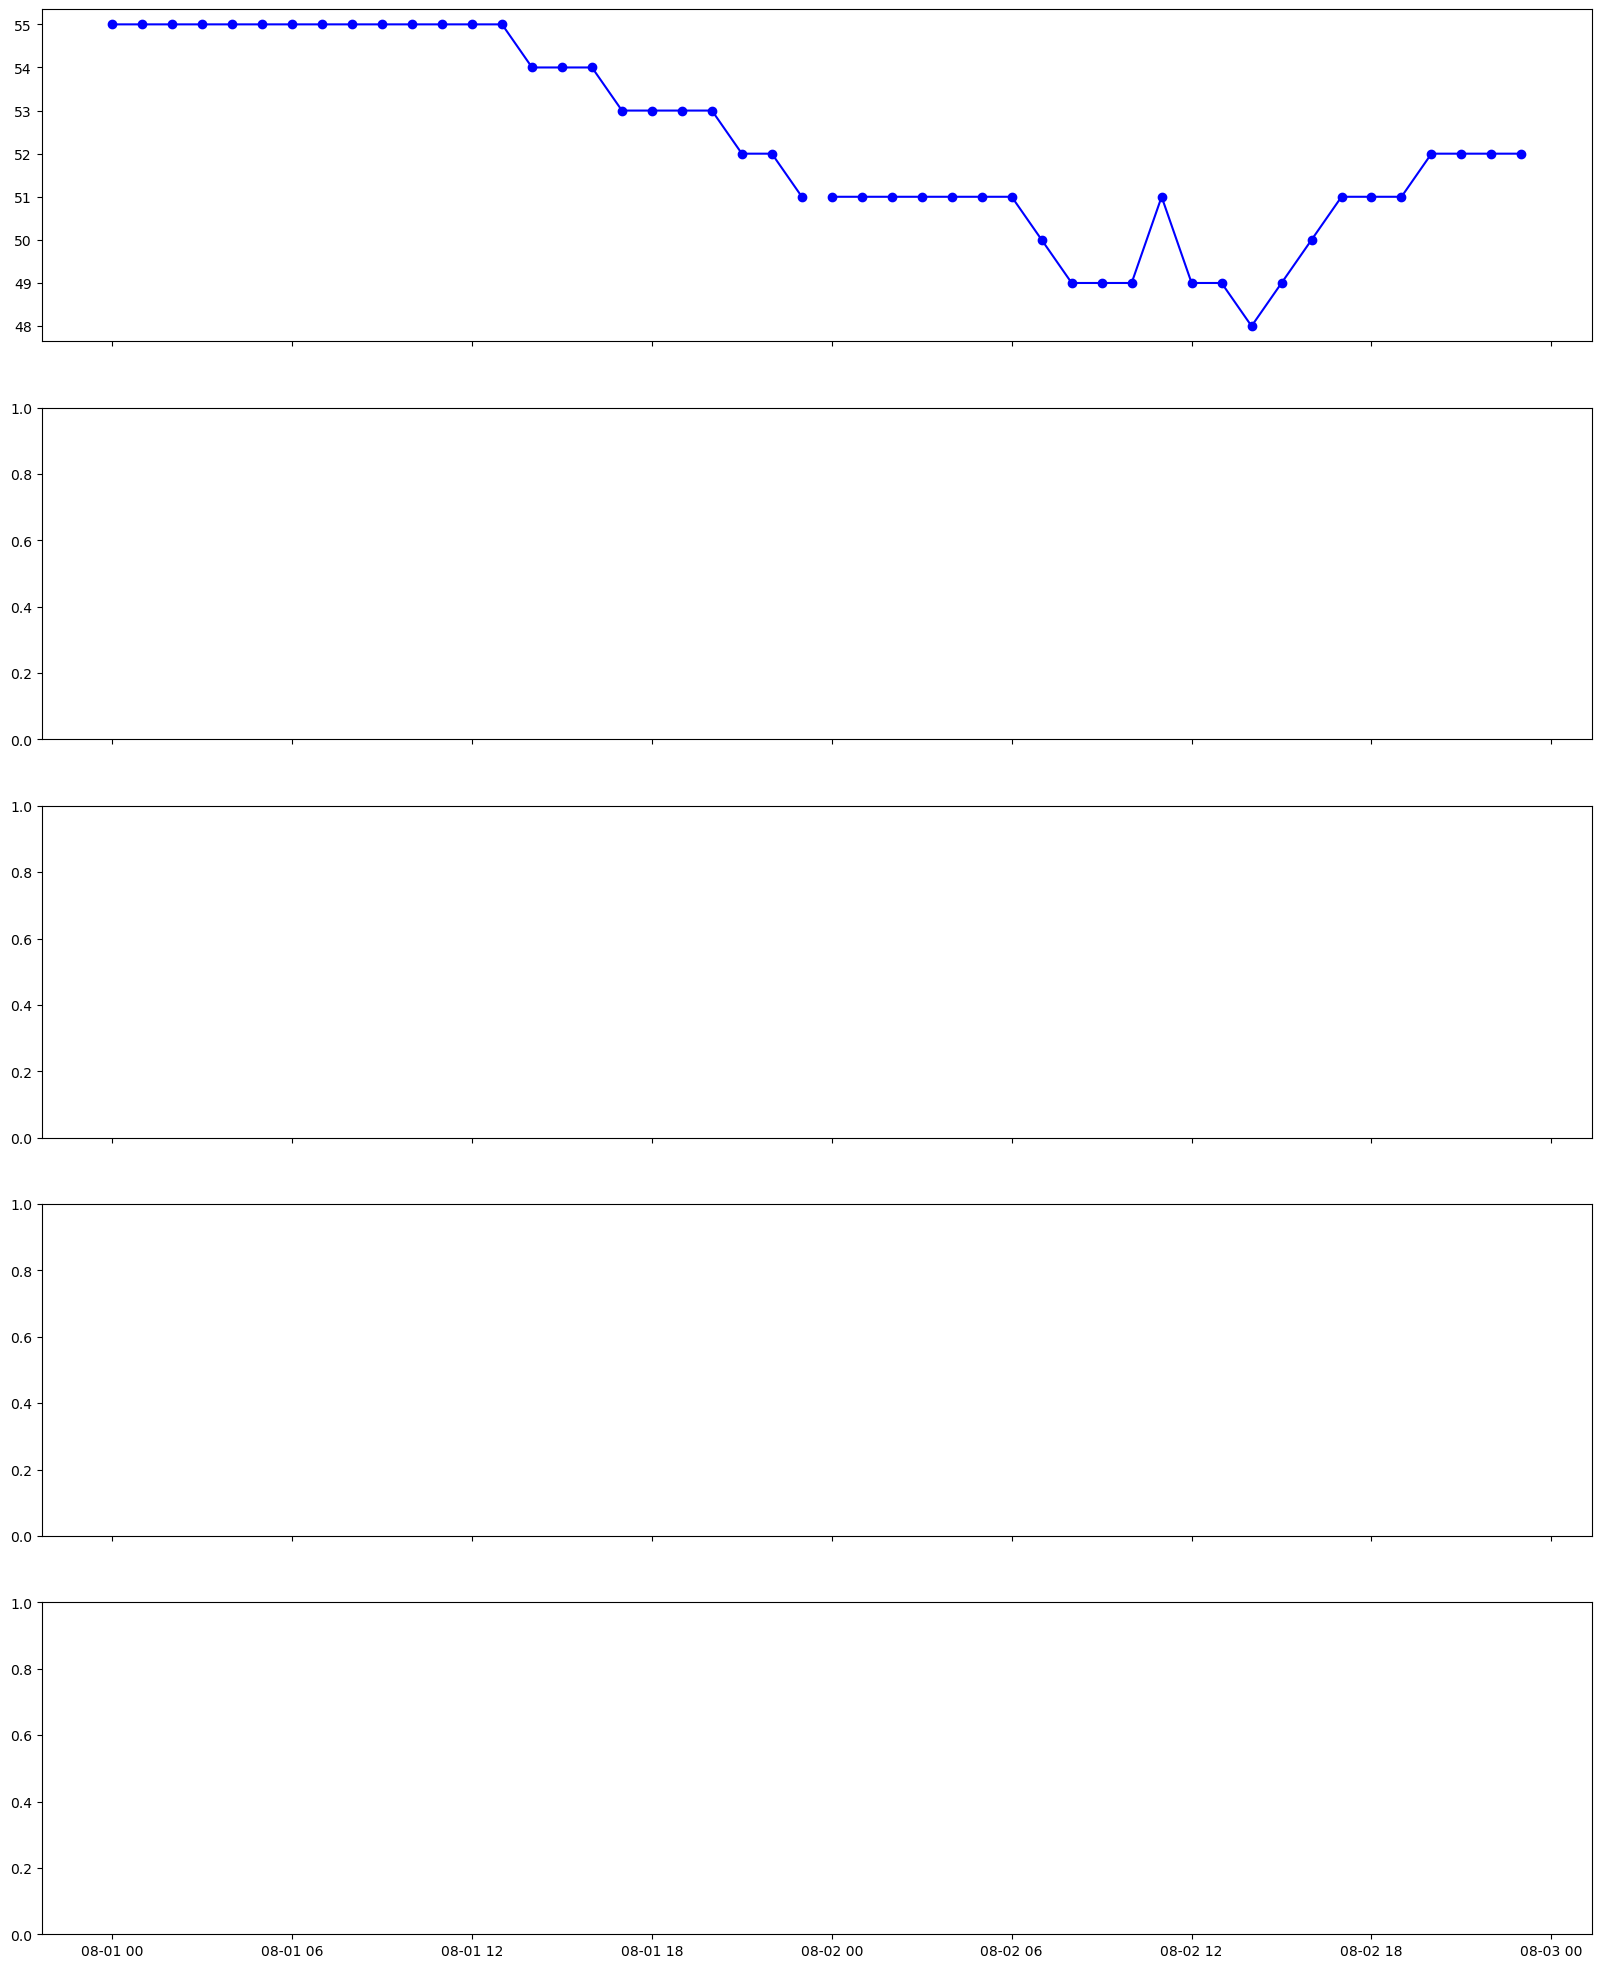

In [16]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates

def fetch_psi_data(date_str):
    """
    Fetch PSI data for a specific date from the API.
    
    Args:
        date_str (str): Date in 'YYYY-MM-DD' format.
        
    Returns:
        dict: JSON response from the API if successful, else None.
    """
    url = f"https://api-open.data.gov.sg/v2/real-time/api/psi?date={date_str}"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        return data
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for {date_str}: {e}")
        return None

def extract_regions_psi(data):
    """
    Extract PSI values for East, West, Central, South, and North regions from API data.
    
    Args:
        data (dict): JSON data from the API.
        
    Returns:
        list of dict: Each dict contains timestamp and PSI values for all regions.
    """
    records = []
    items = data.get("data", {}).get("items", [])
    for item in items:
        timestamp = item.get("timestamp")
        psi_readings = item.get("readings", {}).get("psi_twenty_four_hourly", {})
        # Extract PSI values for all regions
        west = psi_readings.get("west", None)
        east = psi_readings.get("east", None)
        central = psi_readings.get("central", None)
        south = psi_readings.get("south", None)
        north = psi_readings.get("north", None)
        records.append({
            "Timestamp": timestamp,
            "West_PSI": west,
            "East_PSI": east,
            "Central_PSI": central,
            "South_PSI": south,
            "North_PSI": north
        })
    return records

def save_to_csv(df, filename):
    """
    Save the DataFrame to a CSV file.
    
    Args:
        df (pd.DataFrame): DataFrame containing PSI data.
        filename (str): Name of the CSV file.
    """
    df.to_csv(filename, index=False, encoding='utf-8-sig')
    print(f"Data successfully saved to {filename}")

def calculate_increasing_periods(df, regions):
    """
    Calculate the time periods within each day where PSI values are increasing for each region.
    
    Args:
        df (pd.DataFrame): DataFrame containing PSI data.
        regions (list): List of region column names.
        
    Returns:
        pd.DataFrame: DataFrame containing increasing periods per day per region.
    """
    # Initialize a list to store increasing periods
    increasing_periods = []

    # Extract unique dates
    unique_dates = df['Date'].unique()

    for date in unique_dates:
        day_data = df[df['Date'] == date].sort_values('Timestamp')
        for region in regions:
            psi_values = day_data[region].values
            timestamps = day_data['Timestamp'].values

            # Initialize variables to track increasing sequences
            start_time = None
            end_time = None

            for i in range(1, len(psi_values)):
                if psi_values[i] > psi_values[i - 1]:
                    if start_time is None:
                        start_time = timestamps[i - 1]
                    end_time = timestamps[i]
                else:
                    if start_time and end_time:
                        increasing_periods.append({
                            "Date": date,
                            "Region": region.replace('_PSI', ''),
                            "Start_Time": start_time,
                            "End_Time": end_time
                        })
                        start_time = None
                        end_time = None
            # Check if the last sequence continues till the end
            if start_time and end_time:
                increasing_periods.append({
                    "Date": date,
                    "Region": region.replace('_PSI', ''),
                    "Start_Time": start_time,
                    "End_Time": end_time
                })

    # Convert to DataFrame
    periods_df = pd.DataFrame(increasing_periods)
    return periods_df

def visualize_regions_psi(df, increasing_periods_df):
    """
    Create a line chart showing hourly PSI for East, West, Central, South, and North regions.
    Marks points where PSI values are increasing compared to the previous hour.
    
    Args:
        df (pd.DataFrame): DataFrame containing PSI data.
        increasing_periods_df (pd.DataFrame): DataFrame containing increasing periods.
    """
    # Define regions
    regions = ['West_PSI', 'East_PSI', 'Central_PSI', 'South_PSI', 'North_PSI']
    region_colors = {
        'West_PSI': 'blue',
        'East_PSI': 'green',
        'Central_PSI': 'red',
        'South_PSI': 'purple',
        'North_PSI': 'orange'
    }

    # Get list of unique dates sorted
    dates = sorted(df['Date'].unique())
    num_dates = len(dates)
    colors = plt.cm.get_cmap('tab20', num_dates)

    # Create subplots for each region
    fig, axes = plt.subplots(len(regions), 1, figsize=(20, 5 * len(regions)), sharex=True)
    
    for idx, region in enumerate(regions):
        ax = axes[idx]
        for i, date in enumerate(dates):
            day_data = df[df['Date'] == date].sort_values('Timestamp')
            ax.plot(day_data['Timestamp'], day_data[region], marker='o', linestyle='-', label=f"{date} {region.replace('_PSI', '')}", color=region_colors[region])

            # Identify and mark increasing points
            increasing_periods = increasing_periods_df[
                (increasing_periods_df['Date'] == date) &
                (increasing_periods_df['Region'] == region.replace('_PSI', ''))
            ]

            for _, row in increasing_periods.iterrows():
                ax.annotate(
                    '↑',
                    xy=(row['End_Time'], df.loc[df['Timestamp'] == row['End_Time'], region].values[0]),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    color='black'
                )
        
        ax.set_title(f'Hourly PSI for {region.replace("_PSI", "")} Region (August 1-31, 2024)', fontsize=16)
        ax.set_ylabel('PSI', fontsize=14)
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        
        # Add horizontal reference lines based on PSI standards
        if 'PSI' in region:
            ax.axhline(y=50, color='grey', linestyle='--', label='PSI 50')
            ax.axhline(y=100, color='black', linestyle='--', label='PSI 100')
        
        # Create a custom legend to avoid duplicate labels
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys(), title='Date and Region', fontsize=10, title_fontsize=12, loc='upper right')

def main():
    start_date = datetime.strptime("2024-08-01", "%Y-%m-%d")
    end_date = datetime.strptime("2024-08-31", "%Y-%m-%d")
    delta = timedelta(days=1)

    all_records = []

    current_date = start_date
    while current_date <= end_date:
        date_str = current_date.strftime("%Y-%m-%d")
        print(f"Fetching data for {date_str}...")
        data = fetch_psi_data(date_str)
        if data and data.get("code") == 0:
            records = extract_regions_psi(data)
            all_records.extend(records)
            print(f"Successfully fetched data for {date_str}.")
        else:
            print(f"Failed to fetch data for {date_str}.")
        current_date += delta

    if not all_records:
        print("No data fetched. Exiting the program.")
        return

    # Create a DataFrame from the records
    df = pd.DataFrame(all_records)
    
    # Convert 'Timestamp' to datetime objects
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    # Sort the DataFrame by timestamp
    df.sort_values(by='Timestamp', inplace=True)
    
    # Add 'Date' column for easier processing
    df['Date'] = df['Timestamp'].dt.date

    # Save the data to a CSV file
    output_csv = "regions_psi_august01_to_august31.csv"
    save_to_csv(df, output_csv)
    
    # Calculate increasing periods
    regions = ['West_PSI', 'East_PSI', 'Central_PSI', 'South_PSI', 'North_PSI']
    increasing_periods_df = calculate_increasing_periods(df, regions)
    
    # Save increasing periods to a separate CSV
    output_periods_csv = "psi_increasing_periods_august01_to_august31.csv"
    increasing_periods_df.to_csv(output_periods_csv, index=False, encoding='utf-8-sig')
    print(f"Increasing periods data saved to {output_periods_csv}")
    
    # Visualize the data
    visualize_regions_psi(df, increasing_periods_df)

if __name__ == "__main__":
    main()


PSI Increase Counts by Hour (August 1-31, 2024)
    West_PSI  East_PSI  Central_PSI  South_PSI  North_PSI
0          2         7            6          9         10
1          7         7           10          6          7
2          8        10            6          8          8
3          5         6            8          9          8
4          5         7            8         10         11
5          7         5           10          9          7
6          9         5           11          8          9
7          9        11            8          8         11
8          9         9           12          8          7
9          4         5            7          9          9
10        10         8           10          5         14
11         6         5            5         12         10
12         8         9            6          8          6
13         6         6            5          9         10
14         7         7            4          4         10
15         4         6  

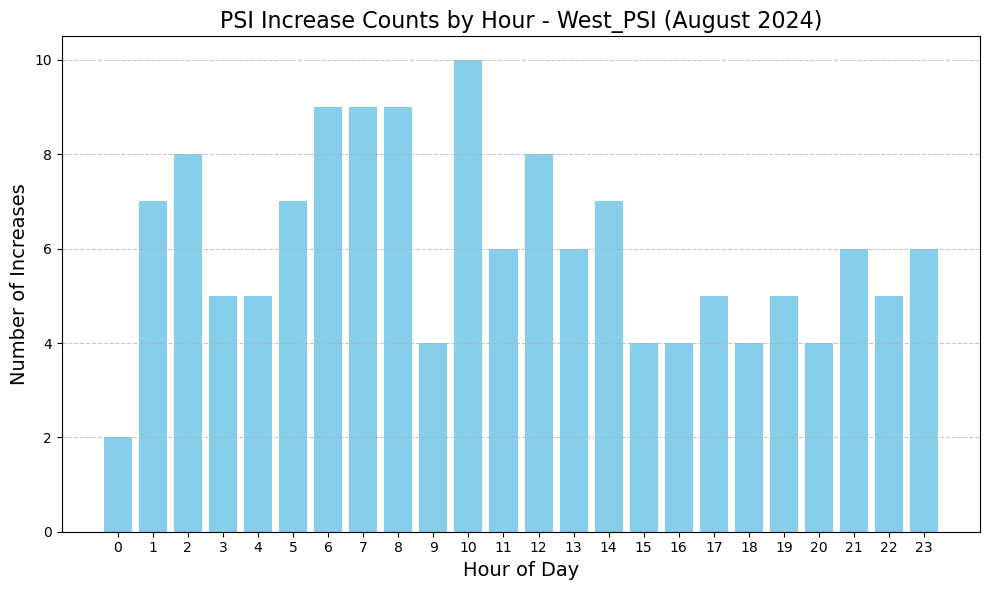

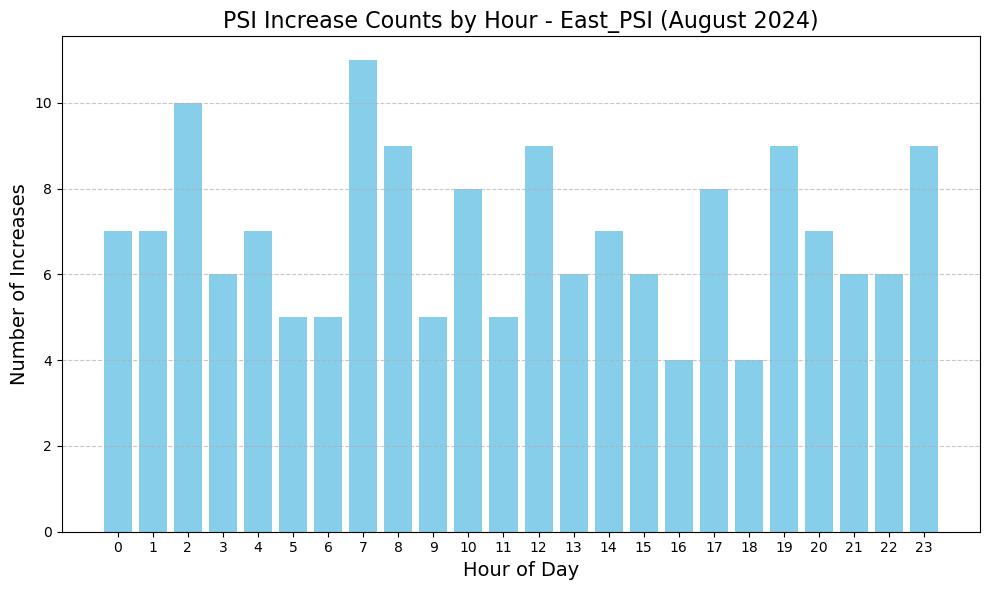

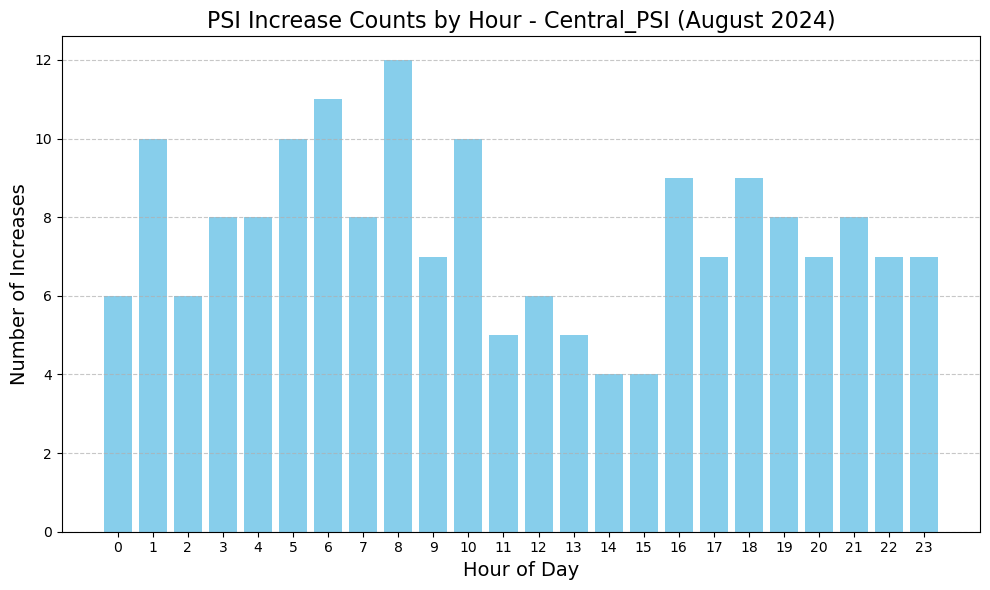

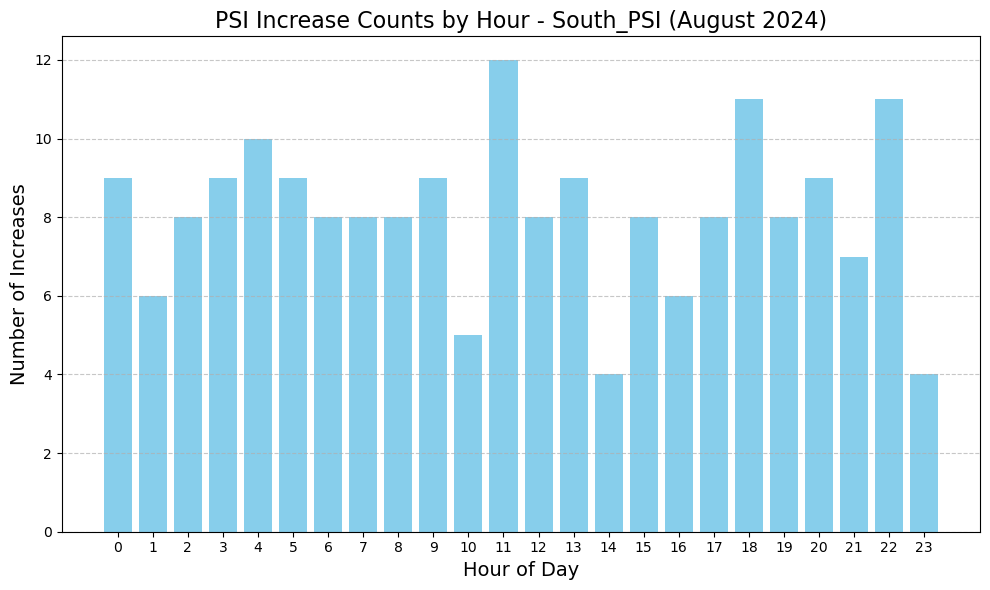

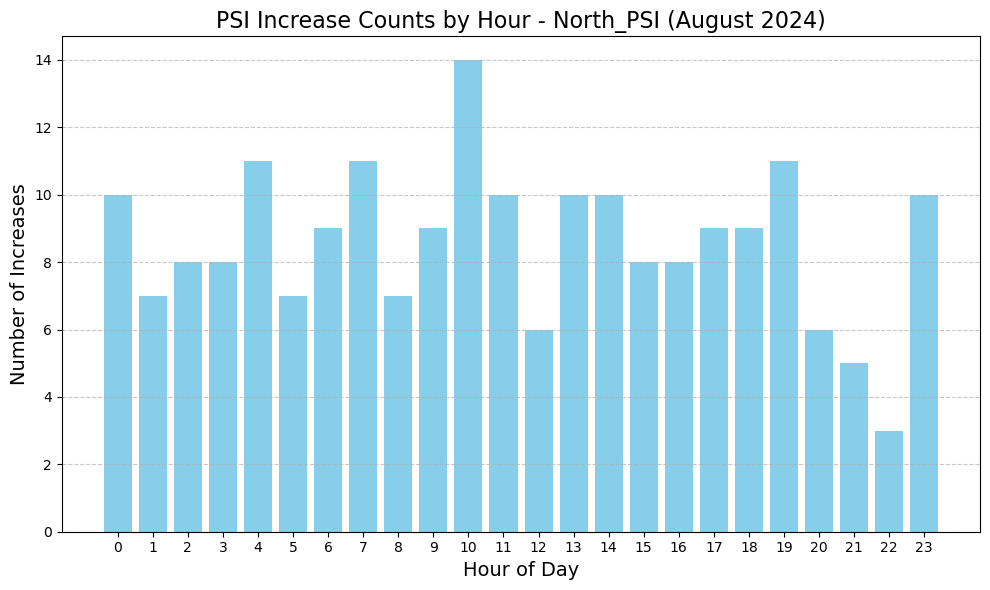

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Read the CSV data
df = pd.read_csv('regions_psi_august01_to_august31.csv')

# 2. Convert 'Timestamp' to datetime objects and set as index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# 3. Ensure data is sorted by time
df.sort_index(inplace=True)

# 4. Extract hour information
df['Hour'] = df.index.hour

# 5. Define regions
regions = ['West_PSI', 'East_PSI', 'Central_PSI', 'South_PSI', 'North_PSI']

# 6. Calculate PSI increase for each region
for region in regions:
    df[f'{region}_Increase'] = df[region].diff() > 0

# 7. Initialize a DataFrame to store statistics
increase_stats = pd.DataFrame(index=range(24), columns=regions)

# 8. Populate the statistics
for region in regions:
    # Group by 'Hour' and sum the 'Increase' booleans (True=1, False=0)
    stats = df.groupby('Hour')[f'{region}_Increase'].sum()
    increase_stats[region] = stats

# 9. Fill missing values with 0
increase_stats.fillna(0, inplace=True)

# 10. Convert index to integer (Hour)
increase_stats.index = increase_stats.index.astype(int)

# 11. Print the statistics table
print("PSI Increase Counts by Hour (August 1-31, 2024)")
print(increase_stats)

# 12. Plot the statistics for each region separately
for region in regions:
    plt.figure(figsize=(10, 6))
    plt.bar(increase_stats.index, increase_stats[region], color='skyblue')
    plt.title(f'PSI Increase Counts by Hour - {region} (August 2024)', fontsize=16)
    plt.xlabel('Hour of Day', fontsize=14)
    plt.ylabel('Number of Increases', fontsize=14)
    plt.xticks(range(0, 24))  # Ensure all hours are shown on the x-axis
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 13. Optional: Save the statistics to a CSV file (if needed)
# increase_stats.to_csv('psi_increase_stats_august2024.csv', index_label='Hour')
# print("Statistics have been saved to 'psi_increase_stats_august2024.csv'")
